# Emergency call analysis

This project involves the analysis of emergency call data from Pennsylvania. The dataset contains detailed information about emergency incidents, including geographic coordinates, postal addresses, emergency types, timestamps, and administrative divisions such as townships and ZIP codes.

The objective of this analysis is to identify trends and patterns in emergency calls to support better resource allocation, improve response efficiency, and understand the distribution of emergency types across different regions and times.

**Importing libraries**

In [1]:
import numpy as np 
import pandas as pd

**Importing visualization libraries**

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set_style('whitegrid')

**Reading csv file as df**

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

**Top 5 township(twp) for 911 calls**

In [7]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

**Total number of unique titles or incidents**

In [8]:
df['title'].nunique()

110

## Creating new features

**Using .apply() with custom lambda expression to create a new column called reason.
For example, if the column value is EMS: BACK PAIN\INJURY, the Reason column value would be EMS**

In [9]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

**The most common Reasons for a 911 call based off of this new column**

In [10]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

**Using seaborn to create a countplot of 911 calls by Reason.**

C:\Users\HP\AppData\Local\Temp\ipykernel_13172\4040305210.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reason',data=df,palette='magma')


<Axes: xlabel='Reason', ylabel='count'>

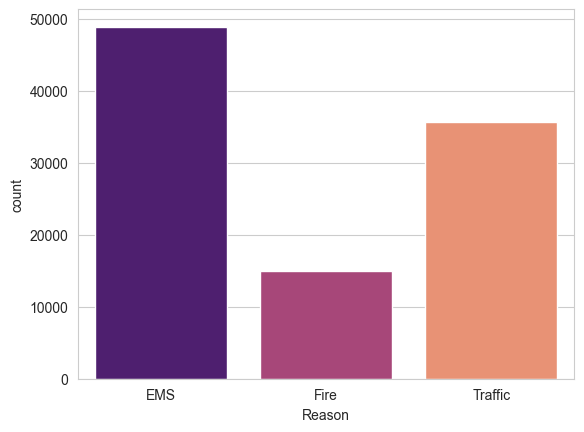

In [11]:
sns.countplot(x='Reason',data=df,palette='magma')

In [12]:
type(df['timeStamp'].iloc[0])

str

**Using pd.to_datetime to convert the column from strings to DateTime objects.**

In [13]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [14]:
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)
df['Month']=df['timeStamp'].apply(lambda time:time.month)
df['Day of Week']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
df['Day of Week']=df['Day of Week'].map(dmap)

**Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

<Axes: xlabel='Day of Week', ylabel='count'>

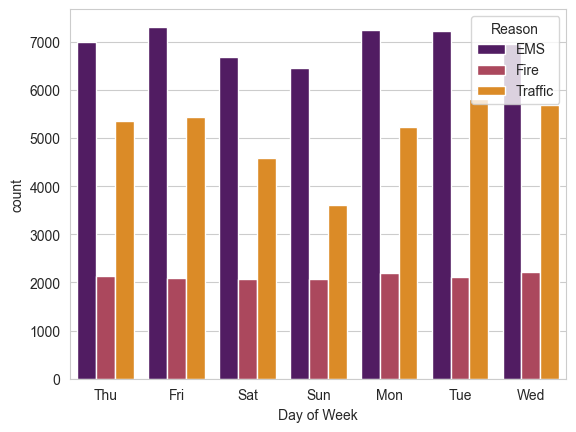

In [17]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='inferno')

<Axes: xlabel='Month', ylabel='count'>

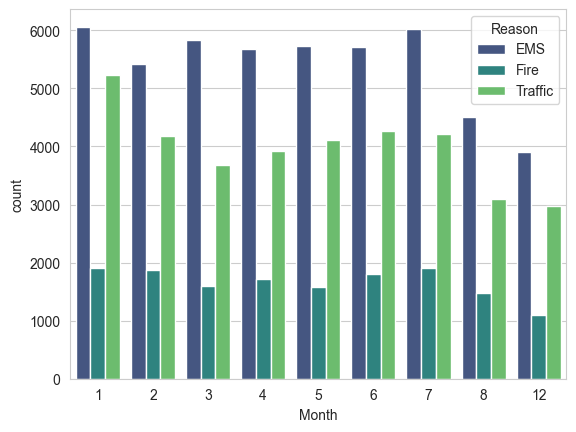

In [18]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

In [19]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Creating a simple plot of the dataframe indicating the count of calls per month.**

<Axes: xlabel='Month'>

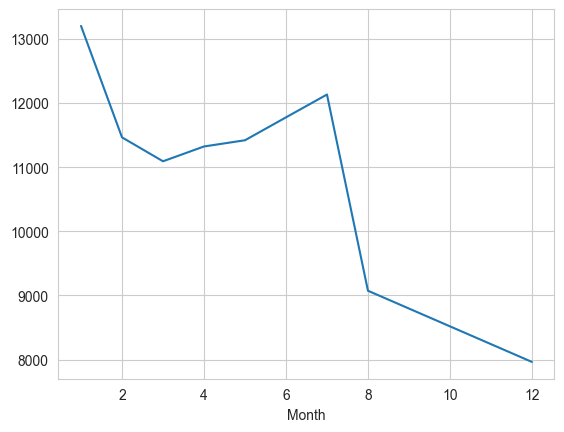

In [20]:
byMonth['twp'].plot()

**Using seaborn's lmplot() to create a linear fit on the number of calls per month by reseting the index to a column.**

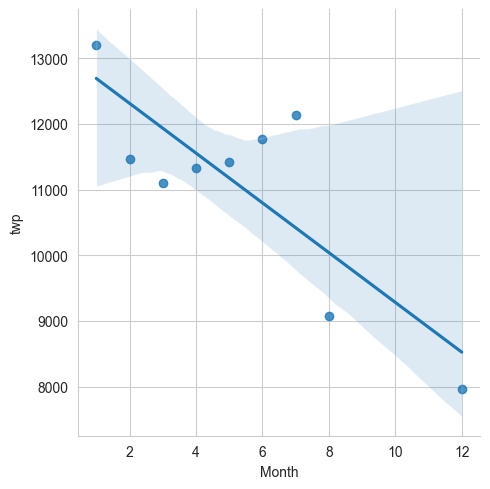

In [21]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Creating a new column called 'Date' that contains the date from the timeStamp column using lamda function along with the .date() method.** 

In [22]:
df['Date']=df['timeStamp'].apply(lambda t:t.date())

**Groupingby this Date column with the count() aggregate and creating a plot of counts of 911 calls.**

<Axes: xlabel='Date'>

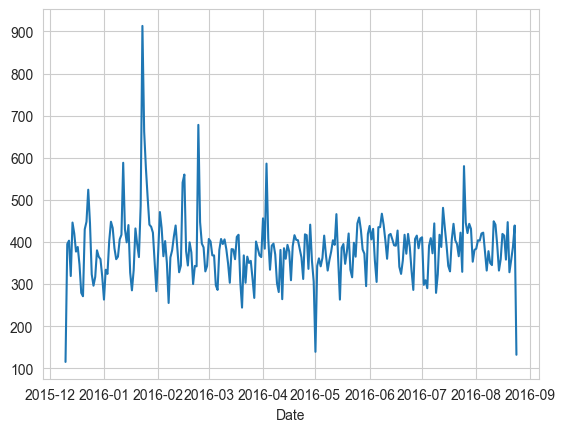

In [23]:
df.groupby('Date').count()['twp'].plot()

Text(0.5, 1.0, 'EMS')

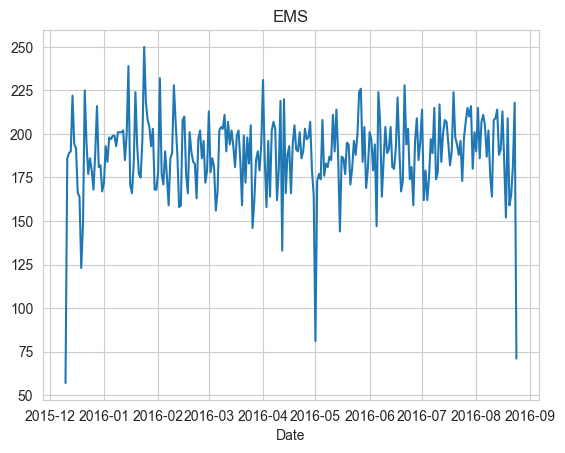

In [24]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')

Text(0.5, 1.0, 'Traffic')

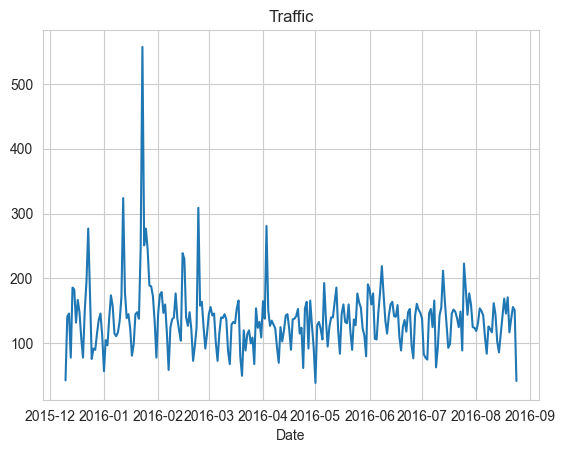

In [25]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

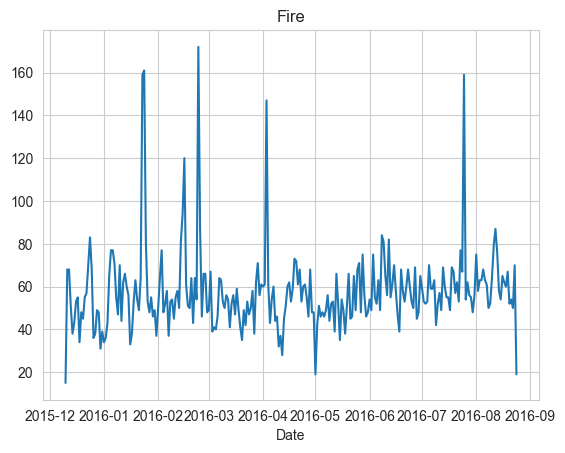

In [26]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')

In [27]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()  

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Creating a heatmap using this new DataFrame**

<Axes: xlabel='Hour', ylabel='Day of Week'>

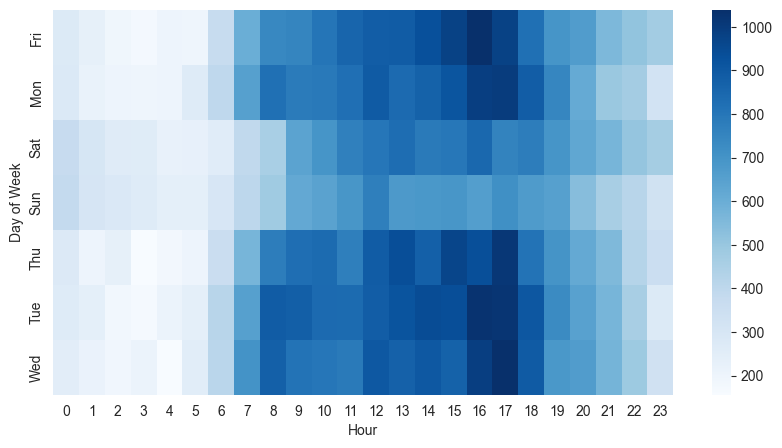

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(dayHour,cmap='Blues')

**Creating a clustermap using this DataFrame**

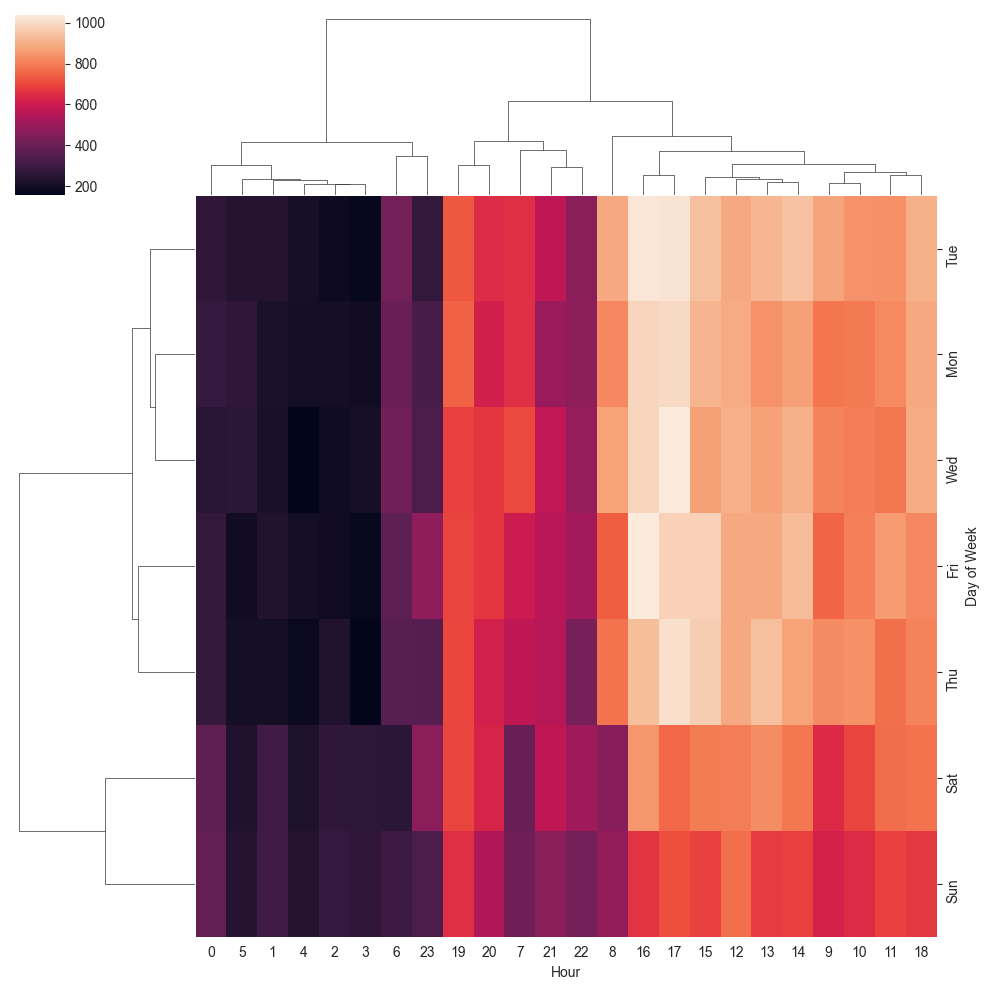

In [29]:
sns.clustermap(dayHour)

In [30]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


**Creating a heatmap for Day of week and Months**

<Axes: xlabel='Month', ylabel='Day of Week'>

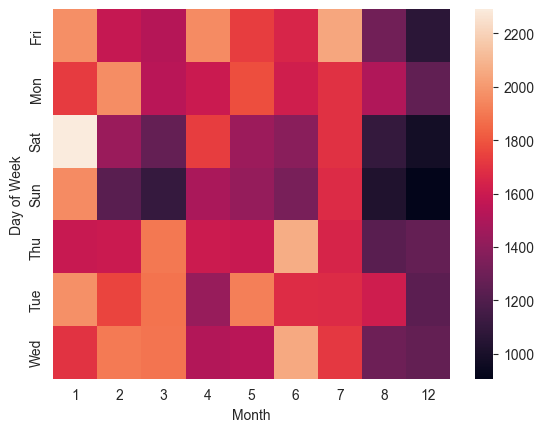

In [31]:
sns.heatmap(dayMonth)

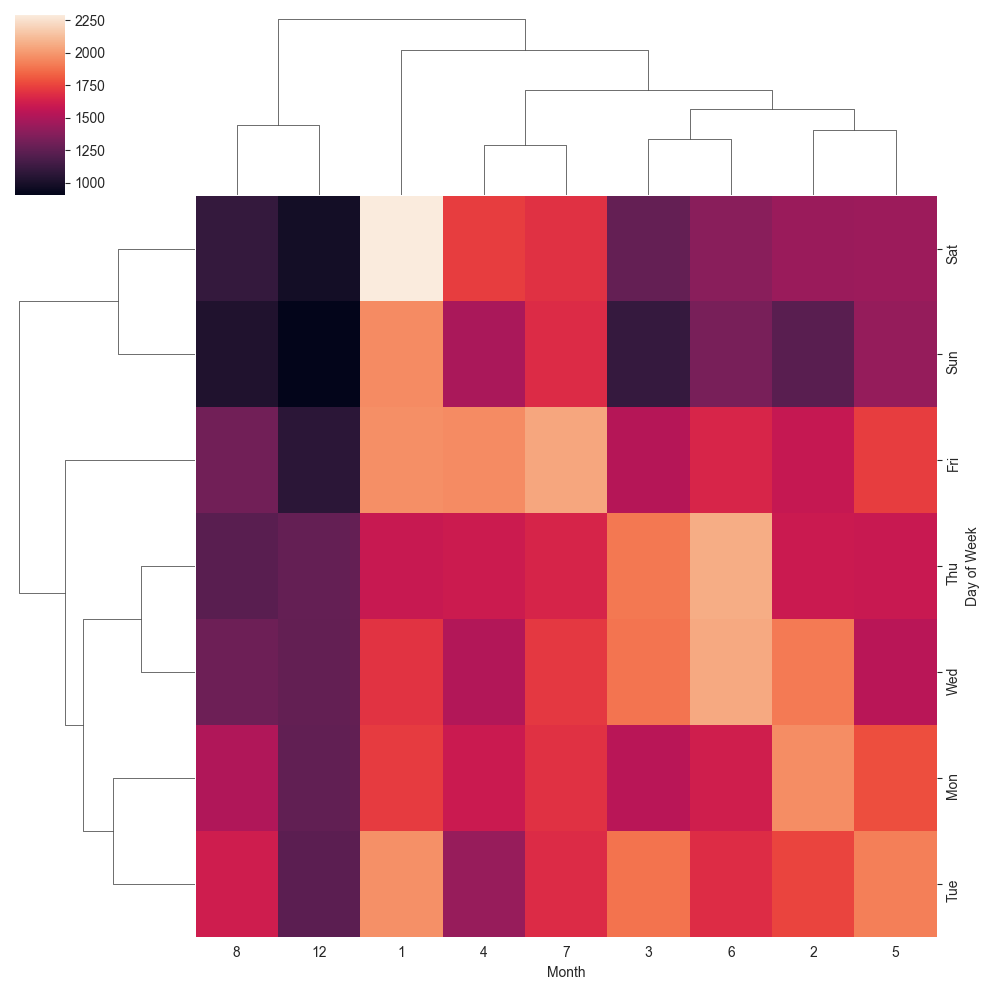

In [32]:
sns.clustermap(dayMonth)